In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database

In [17]:
conn = sqlite3.connect("sales_data.db")

In [18]:
cursor = conn.cursor()
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales(
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product_name VARCHAR NOT NULL,
    product_price INT NOT NULL,
    p_quantity INT,
    total_price INT
)
''')


# Step 2: Create table and insert sample data (if not already present)

In [19]:
cursor.execute("SELECT COUNT(*) FROM sales")
if cursor.fetchone()[0] == 0:
    sample_data = [
        ('Laptop', 750, 2, 1500),
        ('Mouse', 20, 5, 100),
        ('Keyboard', 50, 3, 150),
        ('Monitor', 200, 2, 400),
        ('USB Cable', 10, 10, 100)
    ]
    cursor.executemany('''
    INSERT INTO sales (product_name, product_price, p_quantity, total_price)
    VALUES (?, ?, ?, ?)
    ''', sample_data)
    conn.commit()

# Sample data (optional, only insert if table is empty)

In [20]:
query = '''
SELECT product_name AS product, 
       SUM(p_quantity) AS total_qty, 
       SUM(total_price) AS revenue
FROM sales
GROUP BY product_name
'''
df = pd.read_sql_query(query, conn)

# Step 3: Run SQL query for basic sales summary

In [21]:
print("Basic Sales Summary:")
print(df)

Basic Sales Summary:
     product  total_qty  revenue
0   Keyboard          3      150
1     Laptop          2     1500
2    Monitor          2      400
3      Mouse          5      100
4  USB Cable         10      100



# Step 4: Display results

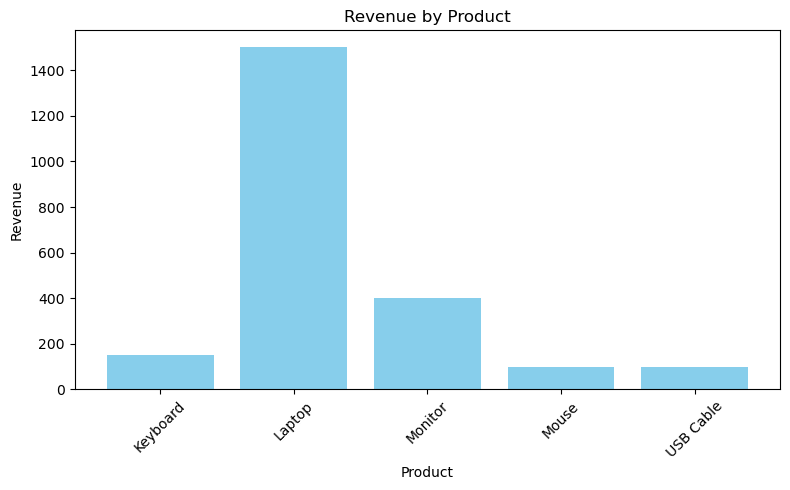

In [22]:
plt.figure(figsize=(8,5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
plt.savefig("sales.png")


<Figure size 640x480 with 0 Axes>

In [24]:
conn.close()